# Support vector machine

## 1. First things first: generate a data set in scikit learn

Support Vector Machines can be used on problem cases where we have an $n$-dimensional feature space. For teaching purposes, however, it is very intuitive to use a 2-dimensional feature space so you can see what exactly is going on when using support vector machines.

scikit learn has excellent data sets generator. one of them is `make_blobs`, another one is `make_moons`. Let's generate four data sets which we'll all analyze using support vector machines.

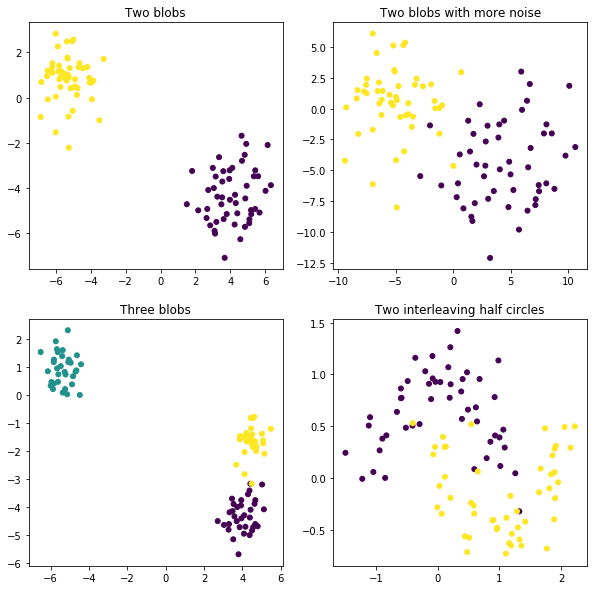

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title("Two blobs")
X, y = make_blobs(n_features = 2, centers = 2, random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.subplot(222)
plt.title("Two blobs with more noise")
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.8,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.subplot(223)
plt.title("Three blobs")
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.subplot(224)
plt.title("Two interleaving half circles")
X, y = make_moons(n_samples=100, shuffle = False , noise = 0.2)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.show()

## 2. Two groups 

### 2.1 Max margin

Let's have a look at our first plot again. We'll start with this data set and fit a simple linear support vector machine on these data. You can use the scikit-learn function `svm.SVC` to do that!

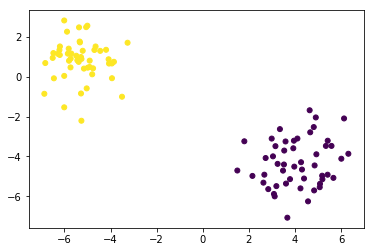

In [19]:
X, y = make_blobs(n_features = 2, centers = 2, random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

In [30]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's save the first feature (on the horizontal axis) as X1 and the second feature (on the vertical axis) as X2.

In [31]:
X1= X[:,0]
X2= X[:,1]

In [32]:
#clf.coef_

Next, let'x store the min and maximum values X1 and X2 operate in. We'll add some slack (1) to the min and max boundaries.

In [33]:
# plot the decision function
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

Let's see if what we just did makes sense. Have a look at your plot and verify the result!

In [34]:
print(X1_max)

7.321748977894958


Next, we'll create a grid. You can do this by using the numpy function `linspace`, which creates a numpy array with evenly spaced numbers over a specified interval. The default of numbers is 50 and we don't need that many, so let's specify `num = 10`

In [54]:
x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

In [55]:
X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

In [56]:
x1x2 = np.vstack([X1_C.ravel(), X2_C.ravel()]).T

Let's now get the coordinates of the decision function

In [58]:
df = clf.decision_function(x1x2).reshape(X1_C.shape)

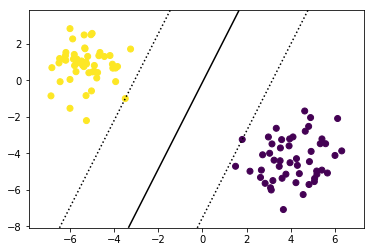

In [67]:
plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

The coordinates of the support vectors can be found in the `support_vectors_`-attribute:

In [71]:
clf.support_vectors_

array([[ 1.80628336, -3.23748621],
       [-3.50355959, -0.99875038]])

Now create your plot again but highlight your support vectors. 

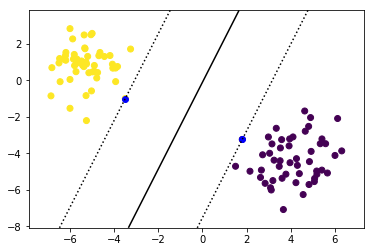

In [72]:
plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue') 
plt.show()

### 2.2 Soft margin tuning

The previous example was pretty easy. The 2 "clusters" were easily separable by one straight line classifying every single instance correctly. But what if this isn't the case? Let's have a look at the second dataset we had generated:

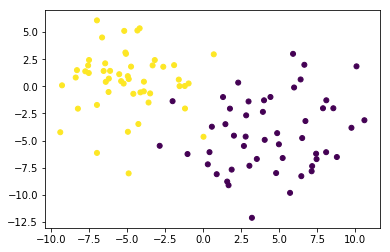

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.8,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)


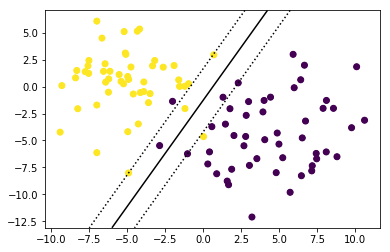

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

from sklearn import svm

clf = svm.SVC(kernel='linear')  #, C=1000000,
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.vstack([X1_C.ravel(), X2_C.ravel()]).T

df = clf.decision_function(x1x2).reshape(X1_C.shape)

plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

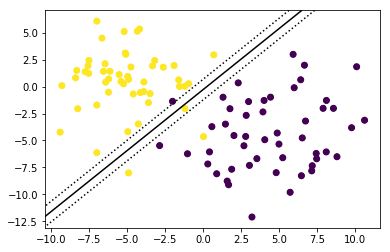

In [76]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.8,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

from sklearn import svm

clf = svm.SVC(kernel='linear', C=1000000) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.vstack([X1_C.ravel(), X2_C.ravel()]).T

df = clf.decision_function(x1x2).reshape(X1_C.shape)

plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

### 2.2 Soft margin

## 3. More than 2 groups

## 3. The kernel trick

https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html